# CAPTCHA Image Detection

_By Yael Rosenfelder (203329784) and Tom Talpir (311206965)_

## Project description

#### What is CAPTCHA?
CAPTCHA stands for __`completely automated public Turing test to tell computers and humans apart`__ and is a type of test used in computing to determine whether or not the user is human.

Over the years, CAPTCHA tasks have evolved from fairly simple tasks to more and more complicated ones.

For example, a textual form of CAPTCHA requires someone to correctly evaluate and enter a sequence of letters or numbers which can be seen in a distorted image displayed on their screen.

Newer versions require users to detect objects in a given image (for example, to detect all crosswalks that are visible in an image)

#### What are we trying to achieve?
Our project will help solve the older textual CAPTCHA versions
<br>
Our goal is to convert textual CAPTCHA images into an actual computer string

#### Why is CAPTCHA detection important?
In a way, CAPTCHA detection can be seen as some sort of OCR _(Optical character recognition)_ problem. 
Finding an efficient way to convert an image with text to an actual string can be helpful in many ways - 

1. **Self-driving cars & modern navigation systems perform a lot of OCR tasks** - Any improvement in the OCR field can help improve the performance & capabilities in this field. For example - reading fingerposts & road signs.
<br><br>
2. **Converting old books & printed texts into digital formats** - For many years, lot's of CAPTCHA texts were actual images from books, and many providers were using this to help the conversion process of printed letters into a digital format. Improvements in this field can make books and other printed formats more accessible for the general public & for people with disabilities.
<br><br>
3. **Improving online accessibility** - CAPTCHAs that are based on reading text can prevent the blind or visually impaired users from accessing certain online resources. An automatic way of converting CAPTCHA's into actual text can help such tasks, and improve accessibility for many users.


#### What will a good solution look like?
General text detection - We know that certain characters will be hard to detect, since many of them appear to be very similar in CAPTCHA's. 

For example, the characters `i`, `l`, `1` can be confusing even for a human. Even here, the digit `one` and the letter `L` are almost identical! 

Our goal is to detect the characters that construct a word in an image, while allowing the errors described above - confusion between characters from similar "clusters".


Due to time constraints & the lack of suitable hardware (GPU's), we're aware that correctly classifying everything will be a very difficult task.

## Data
Our data consists of CAPTCHA images that we'll automatically generate via code.

The generated images will include random characters & words.

When generating a single character, there are 62 possible options - 
* 26 lowercase English letters (a, b, c, ...)
* 26 uppercase English letters (A, B, C, ...)
* 10 digits (0, 1, 2, ...)

The size of the dataset will be very large - we can generate as many images as we want!
<br>
For our initial version in which we're trying to detect a single letter, we generated around `200,000` characters, which is about `3000` images for every character.

In addition, we'll use different fonts while generating each character/word.
<br>

Each image has the following dimensions - `80x80x3` (WxHxC)

In addition, we might end up **limiting** the total length of a word we're trying to detect. 
<br>
Since a word might be very long, we'll set a limit for the maximum length (the limit hasn't been decided yet)

Here are a few examples of single character images, which we generated -

In [5]:
from IPython.display import Image

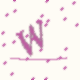

In [3]:
Image("/Users/tomtalpir/dev/tom/captcha_project/CaptchaImgGeneration/o_w_test/w_f960487b.png")

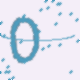

In [6]:
Image("/Users/tomtalpir/dev/tom/captcha_project/CaptchaImgGeneration/train_dataset/0_1b6696b3.png")

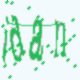

In [8]:
Image("/Users/tomtalpir/dev/tom/captcha_project/CaptchaImgGeneration/idan_test.png")

### Software & tools

We'll be using several tools and software packages for our project - 
* Python for generating our data and performing certain image transformations. We'll be using the following packages -
    * `skimage`, `pandas`, `captcha` (A package for generating CAPTCHA's), `PIL`
* PyTorch for training Neural Networks

* We might end up using additional Python ML/Deep Learning frameworks for future solutions

* When analyzing & displaying our results, we'll use certain visualization packages such as 
    * `Seaborn`
    * `matplotlib`

## Future plans

So far we've been working on a single character detection.

The main goal is to move from a single character detection to the detection of a full word.

To do so, we thought of 2 different approaches, and we'll try implementing both. 

### Character segmentation & single character detection
In this approach we'll divide the characters that construct a word into single images, and detect each one on it's own.

We'll try performing the segmentation using **object detection algorithms**. 

Once we divided the full word into separate characters, we'll perform single character detection on each one, to detect it's class.
<br>
So far we thought of the following approaches to perform object detection tasks - 

Assuming that our project doesn't require real-time detection, we might end up using non-real-time algorithms with higher detection rates rather than real-time detection algorithms with lower detection rates. 

From our current research it seems like the best approach might be the `SSD` or `R-FCN` models (and not `YOLO` which is better for real-time detection)

Once the objects have been detected, we'll use a ConvNet to classify the images. We will try 2 main approaches for classifying a single letter - 
1. Our own ConvNet architecture - We'll experiment with different types of network configurations
2. Transfer learning - We'll using a pretrained model, such as VGG19


### Using a Recurrent Neural Network
RNN's might have a big advantage when trying to detect a word - we won't have to perform character segmentation since the network will keep processing the image, going over all the characters.

For example, RNN's are used when trying to read images of cursive writing, which might be a similar concept here since the characters in a CAPTCHA image can be connected to each other.

## What we've done so far

So far we've generated over 200,000 single character images, and started working on a very simple & straightforward **Convolutional Neural Network** to detect single character images.

We tried a few simple ConvNet architectures using the PyTorch framework.

Here's an example of one - 

In [ ]:
class SingleLetterCaptchaDeepCNN(nn.Module):
    def __init__(self):
        super(SingleLetterCaptchaDeepCNN, self).__init__()

        self.conv1_layer = nn.Conv2d(3, 32, 5) 
        self.conv2_layer = nn.Conv2d(32, 16, 3) 
        self.conv3_layer = nn.Conv2d(16, 8, 2) 

        self.layer_size_after_convs = 8 * 5 * 5 
        self.fc1 = nn.Linear(self.layer_size_after_convs, TOTAL_NUM_OF_CLASSES)
            
    def forward(self, x):
        """
        Perform a forward pass on the network
        """
        x = F.relu(self.conv1_layer(x))
        x = F.max_pool2d(x, (3, 3))

        x = F.relu(self.conv2_layer(x))
        x = F.max_pool2d(x, (2, 2))

        x = F.relu(self.conv3_layer(x))
        x = F.max_pool2d(x, (2, 2))
        x = x.view(-1, self.layer_size_after_convs)
        x = self.fc1(x)
        x = F.softmax(x, dim=1)
        return x

We've also experimented with different hyperparameters & ways for training the network - 
* **SGD/Adam**
* different learning rates and regularization values
* **Different ConvNet architectures** - deeper layers, more/less Convolution filters, more Fully Connected layers and so on

The following code was used to train the network - 

In [ ]:
model = SingleLetterCaptchaDeepCNN()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=0.0001)

total_steps = len(train_dataset_loader)

epochs = 100
for epoch_num in range(epochs):
    for i, (img_batch, labels) in enumerate(train_dataset_loader):
        optimizer.zero_grad()
        fw_pass_output = model(img_batch)
        loss_values = loss_func(fw_pass_output, labels)        
        loss_values.backward()
        optimizer.step()

        print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch_num+1, epochs, i+1, total_steps, loss_values.item()))

So far the network described above succeeded in classifying only a limited set of characters, but failed when trying to classify all the 62 characters together.

So for example, when trying to classify only the following characters - `a, m, p, w, x` 
we managed to train a network that classifies with nearly **_80% accuracy!_**

However when increasing the amount of characters and digits, our performance decreased.
